In [46]:
#import packages
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

yf.pdr_override() # <== that's all it takes :-)

# download dataframe
amazon_data = pdr.get_data_yahoo("AMZN", start="2018-10-01", end="2023-09-30")
meta_data = pdr.get_data_yahoo("META", start="2018-10-01", end="2023-09-30")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [26]:
amazon_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,101.099503,101.659500,100.180000,100.218002,100.218002,69210000
2018-10-02,99.999496,100.669502,98.288498,98.565498,98.565498,108014000
2018-10-03,99.084999,99.485001,97.490501,97.638000,97.638000,105062000
2018-10-04,97.449997,97.800003,94.828499,95.471001,95.471001,145140000
2018-10-05,95.899498,96.454002,93.141502,94.482498,94.482498,136446000
...,...,...,...,...,...,...
2023-09-25,129.360001,131.779999,128.770004,131.270004,131.270004,46017800
2023-09-26,130.119995,130.389999,125.279999,125.980003,125.980003,73048200
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400


In [27]:
amazon_data['company_name'] = 'AMAZON'
meta_data['company_name'] = 'META'

In [28]:
am_data = pd.concat([amazon_data, meta_data], axis = 0)
am_data.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2018-10-01,101.099503,101.659500,100.180000,100.218002,100.218002,69210000,AMAZON
2018-10-02,99.999496,100.669502,98.288498,98.565498,98.565498,108014000,AMAZON
2018-10-03,99.084999,99.485001,97.490501,97.638000,97.638000,105062000,AMAZON
2018-10-04,97.449997,97.800003,94.828499,95.471001,95.471001,145140000,AMAZON
2018-10-05,95.899498,96.454002,93.141502,94.482498,94.482498,136446000,AMAZON


In [29]:
am_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,175.750008,178.166294,173.360525,175.767605,175.767605,5.234954e+07
std,74.110170,75.012639,73.238348,74.122067,74.122067,4.080575e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,6.046300e+06
25%,116.959999,118.777500,115.243128,117.087498,117.087498,2.021450e+07
50%,162.600006,165.025002,160.587502,162.863251,162.863251,4.369105e+07
75%,208.712498,211.600006,206.512497,209.592499,209.592499,7.034600e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,3.113460e+08


In [30]:
amazon_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,124.859054,126.410298,123.169793,124.793088,124.793088,8.083396e+07
std,32.557162,32.839860,32.202920,32.483063,32.483063,3.826497e+07
min,67.300003,69.801498,65.349998,67.197998,67.197998,1.762600e+07
25%,93.554499,94.686249,92.474001,93.492498,93.492498,5.551405e+07
50%,120.840248,122.879997,119.136997,121.029999,121.029999,6.898235e+07
75%,158.346878,159.930752,156.224998,158.093746,158.093746,9.516050e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,3.113460e+08


In [31]:
meta_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,226.640962,229.922289,223.551256,226.742123,226.742123,2.386512e+07
std,68.884947,69.413139,68.210873,68.821842,68.821842,1.559870e+07
min,90.080002,90.459999,88.089996,88.910004,88.910004,6.046300e+06
25%,174.362495,176.500004,171.632500,174.342499,174.342499,1.514428e+07
50%,208.754997,211.600006,206.514999,209.654999,209.654999,2.025760e+07
75%,279.139999,285.220009,276.264999,280.827492,280.827492,2.802978e+07
max,381.679993,384.329987,378.809998,382.179993,382.179993,2.323166e+08


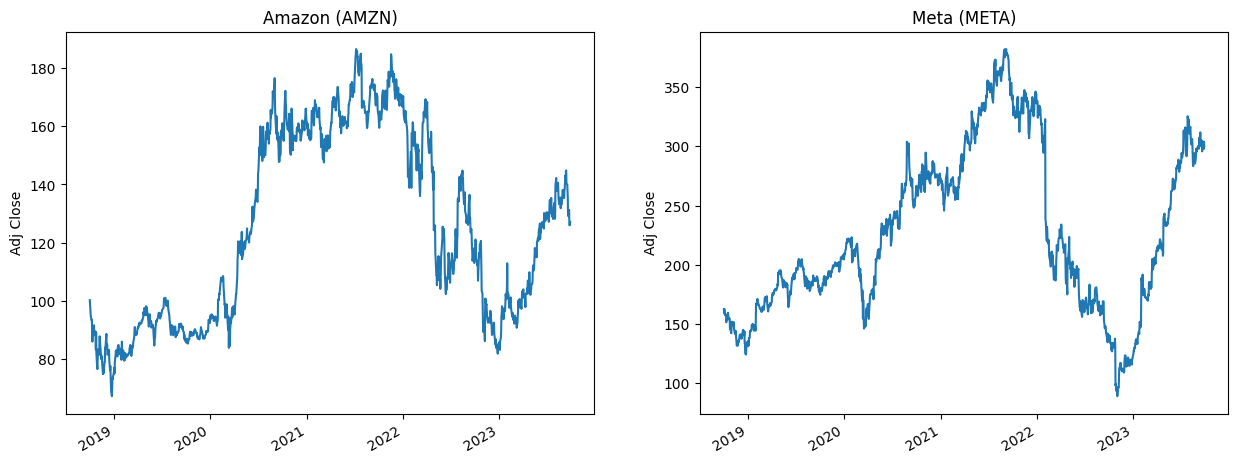

In [37]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
datalist = ['Amazon (AMZN)', 'Meta (META)']

for i, company in enumerate([amazon_data, meta_data], 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(datalist[i-1])

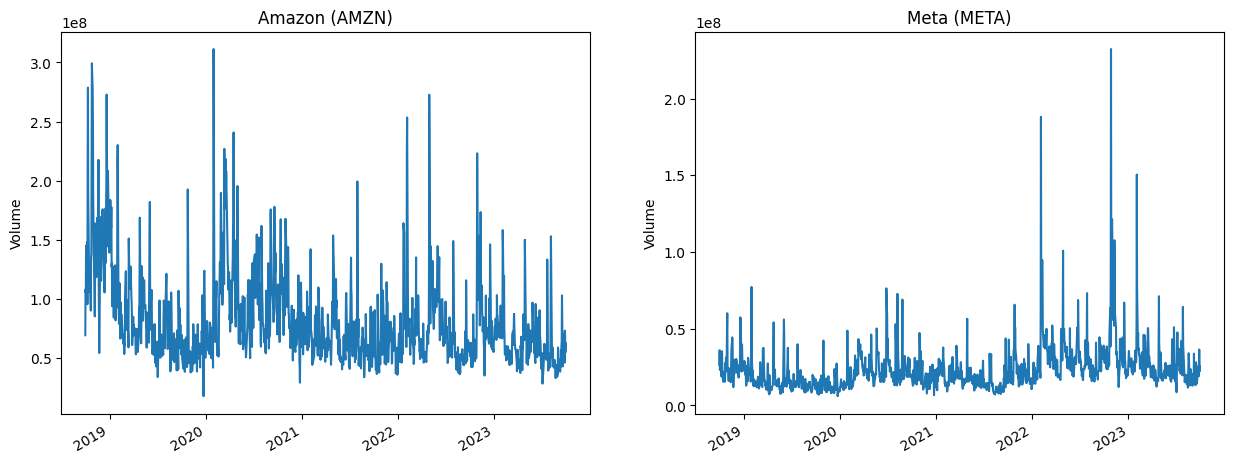

In [38]:
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)
datalist = ['Amazon (AMZN)', 'Meta (META)']

for i, company in enumerate([amazon_data, meta_data], 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(datalist[i-1])

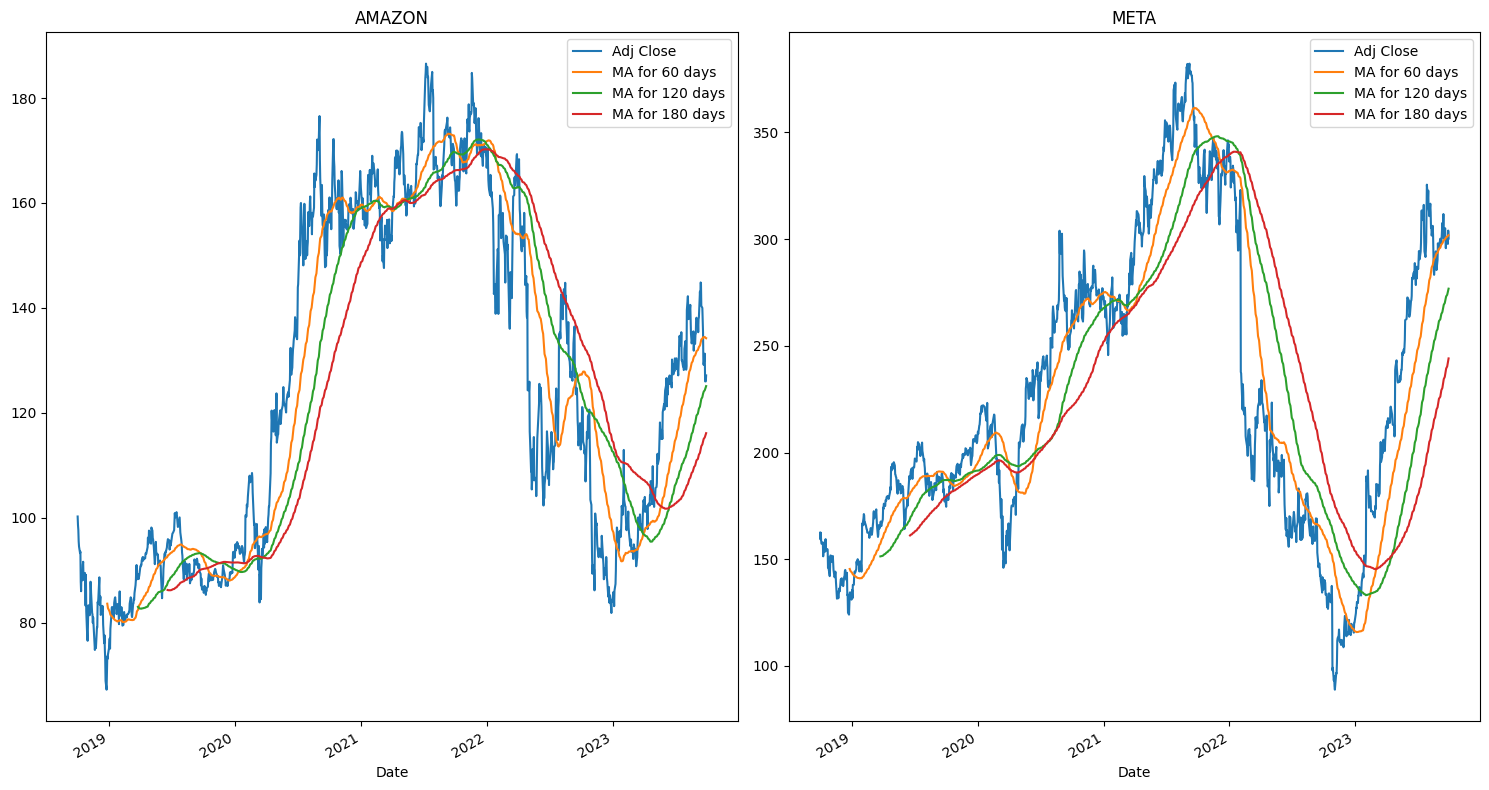

In [42]:
ma_day = [60, 120, 180]

for ma in ma_day:
    for company in [amazon_data, meta_data]:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

amazon_data[['Adj Close', 'MA for 60 days', 'MA for 120 days', 'MA for 180 days']].plot(ax=axes[0])
axes[0].set_title('AMAZON')

meta_data[['Adj Close', 'MA for 60 days', 'MA for 120 days', 'MA for 180 days']].plot(ax=axes[1])
axes[1].set_title('META')
fig.tight_layout()

/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/lib/python3.11/site-packages/seaborn/distributions.py:2142: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'META daily returns')

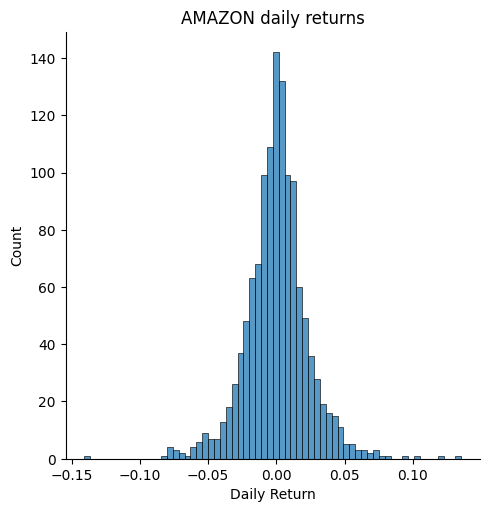

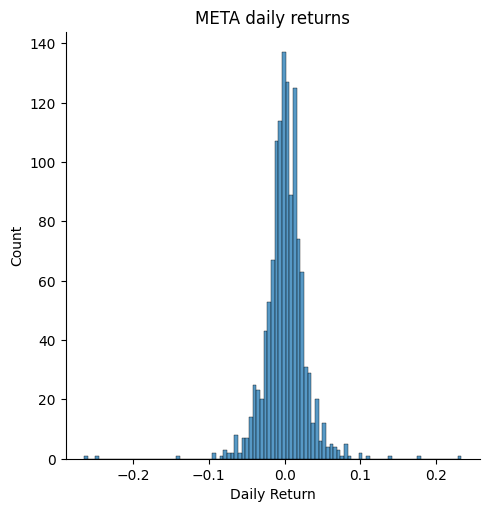

In [52]:
# I’ve used pct_change to find the percent change for each day
for company in [amazon_data, meta_data]:
    company['Daily Return'] = company['Adj Close'].pct_change()

# To plot the daily return percentage
fig.set_figheight(8)
fig.set_figwidth(15)

sns.displot(data=amazon_data['Daily Return'], ax=axes[0], legend=True)
plt.title('AMAZON daily returns')

sns.displot(data=meta_data['Daily Return'], ax=axes[1], legend=True)
plt.title('META daily returns')